# Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import pandas as pd
import sys
from tqdm import tqdm
import seaborn as sns
import random
from statistics import mode
#from scipy.stats import mode

# Análisis de datos

#### Función para leer dataframe

In [2]:
def cargar_df():
    path_ = input('Ingresar ruta de acceso del archivo') 
    sep_ = input('Ingresar caracter de separación:')
    df_load = pd.read_csv(path_, sep=sep_)
    return df_load

#### Función para calcular el número de atributos y los atributos contenidos en el dataframe

In [3]:
def Numero_atributos(df_na):
    num_atributos_ = df_na.shape[1]    #número de columnas
    atributos_ = list(df_na.columns)   #extrae columnas-->lista

    print(f'El dataset tiene {num_atributos_} atributos:')
    
    for i in range(num_atributos_):   
        print(f'{i+1}.- {atributos_[i]} ')
    return num_atributos_, atributos_

#### Función para obtener los atributos, sus observaciones y el tipo de atributo

In [4]:
def Observaciones(df_o, atributos_o):
    observaciones_ = {}
    for i, atributo in enumerate(atributos_o):
        obs_ = df_o[atributo].value_counts() #Return a Series containing counts of unique values.
        obs_l_ = list(obs_.index)            #Lista de los valores únicos encontrados
        obs_ = pd.DataFrame(obs_.index)      

        tipo = df_o[atributo].dtypes

        if tipo == 'object': tipo = 'categórico'
        elif tipo == 'int': tipo = 'entero'
        elif tipo == 'float64': tipo = 'flotante'

        print(f'''El atributo {atributo} es de tipo {tipo}, contiene {len(obs_l_)} observaciones y son las siguientes:
        {obs_l_}
              ''')
        observaciones_.update({atributo:obs_})    
    return observaciones_

#### Función para calcular el número de instancias

In [5]:
def Numero_instancias(df_ni):
    num_instancias_ = df_ni.shape[0]
    print(f'El dataset tiene {num_instancias_} instancias')
    return num_instancias_

#### Función para conocer el número de datos faltantes

In [6]:
def Datos_Faltantes(df_):
    faltantes_df = df_.isnull().sum()
    print(f'Datos faltantes por atributo:\n {faltantes_df}')
    #return faltantes_df

# Relación entre atributos

In [7]:
def cuartiles(df_, atributo_):
#1. 25% de los datos es menor que o igual a este valor.
#2. La mediana. 50% de los datos es menor que o igual a este valor.
#3. 75% de los datos es menor que o igual a este valor.
#rango intercuartil. La distancia entre el primer 1er cuartil y el 3er cuartil (Q3-Q1); de esta manera, abarca el 50% central de los datos.

#ordenar los elementos de la columna
  v = df_[atributo_]
  v = np.asarray(v.sort_values())
  n = len(v)
  if n % 2 == 0:
 
    #calcular cuartil uno 
    a = int(n/4) 
    q1 = v[a]
    #calcular cuartil dos
    b = (n)/2
    c = b - 1
    q2 = (v[b] + v[c])/2
    #calcular cuartil tres
    d = int((3*n)/4)
    q3 = v[d]
  else:

    #calcular cuartil dos
    b = int(n/2)
    q2 = v[b]
    
    if b % 2 == 0:
      #calcular cuartil uno 
      a = int(n/4) 
      q1 = (v[a] + v[a-1])/2
      #calcular cuartil tres 
      d = int((3*(n))/4) 
      q3 = (v[a] + v[d-1])/2
    else:

      #calcular cuartil uno 
      a = int(n/4) 
      q1 = v[a]
      #calcular cuartil tres
      d = int((3*n)/4)
      q3 = v[d]

  print(f'Q1: {q1}, Q2: {q2}, Q3: {q3}')
  return q1, q2, q3

In [8]:
def outlier(df_,atributo_):
  v = df_[atributo_]
  q1, q2, q3 = cuartiles(df_,atributo_)
  out = []
  for valor in v:
    if valor < q1:
      if abs(valor-q1) > 1.5*(q3-q1):
        out.append(valor)
    if valor > q3:
      if abs(valor-q3) > 1.5*(q3-q1):
        out.append(valor)
    
  if len(out) == 0:
    print(f'No existen valores atípicos en el atributo {atributo_}')
  else:
    print(f'Se encontraron {len(out)} valores atípicos')
    print(f'Los valores atípicos encontrados son: {np.asarray(out)}')
  return out

In [9]:
def box_plot(df_, atributo_):
  fig, ax = plt.subplots(figsize = (15,13))
  plt.boxplot(df[atributo_])
  plt.title(f'Distribución de {atributo_}', fontsize = 18)
  plt.show()

In [10]:
def box_plot_sns(df_, atributo_,atributo_d):
  fig, ax = plt.subplots(figsize = (13,8))
  print(atributo_)
 # ax = sns.catplot( x=atributo_, y=atributo_d,data=df_,kind = "box", aspect = 1.5)
  ax = sns.boxplot(x=df[atributo_],y=atributo_d, data=df)
  plt.title(f'Distribución de {atributo_}', fontsize = 18)
  plt.show()

In [11]:
def Distribucion(df_, atributo_, atributo_d):
  fig, ax = plt.subplots(figsize = (10,8))
  sns.histplot(data = df_, x = atributo_, hue = atributo_d, ax = ax, kde=True, element = 'step')
  plt.title(f'Distribución de {atributo_}', fontsize = 18)
  ax.set_xlabel(atributo_)
  ax.set_ylabel("Frequencia")
  plt.show()

In [12]:
def Distribucion_atributo(df_, atributo_, atributo_d):
  anm = pd.DataFrame(atributo_)
  name_atributo_ = anm.columns.values.tolist()
  fig, ax = plt.subplots(figsize = (10,8))
  sns.histplot(data = df_, x = atributo_, hue = atributo_d, ax = ax, kde=True, element = 'step')
  plt.title(f'Distribución de {name_atributo_}', fontsize = 18)
  ax.set_xlabel(name_atributo_)
  ax.set_ylabel("Frequencia")
  plt.show()

In [13]:
def Balance_clases(df):

  atributo_d = input('¿Cuál es tu atributo de decisión?:')
  clases = df[atributo_d]
  cl = clases.value_counts() 
  cl_ = list(cl.index)

  porcentajes_ = (cl*100)/sum(cl)
  print(porcentajes_)

  print(f'El dataset cuenta con {len(cl_)} clases y son las siguientes: {cl_}')

# Cargar dataset original

In [14]:
#/content/drive/MyDrive/Machine_Learning/Tarea01/heart_2020_cleaned (1).csv
#/content/drive/MyDrive/Machine_Learning/Tarea01/codificado_noindex (1).csv
#/content/drive/MyDrive/Machine_Learning/HeartDisease.csv
#heart_2020_cleaned.csv
df = cargar_df()

Ingresar ruta de acceso del archivo heart_2020_cleaned.csv
Ingresar caracter de separación: ,


In [15]:
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

# Adquisición de información

In [156]:
num_atributos, atributos = Numero_atributos(df)

El dataset tiene 18 atributos:
1.- HeartDisease 
2.- BMI 
3.- Smoking 
4.- AlcoholDrinking 
5.- Stroke 
6.- PhysicalHealth 
7.- MentalHealth 
8.- DiffWalking 
9.- Sex 
10.- AgeCategory 
11.- Race 
12.- Diabetic 
13.- PhysicalActivity 
14.- GenHealth 
15.- SleepTime 
16.- Asthma 
17.- KidneyDisease 
18.- SkinCancer 


In [36]:
num_instancias = Numero_instancias(df)

NameError: name 'df' is not defined

In [157]:
observaciones = Observaciones(df, atributos)

El atributo HeartDisease es de tipo categórico, contiene 2 observaciones y son las siguientes:
        ['No', 'Yes']
              
El atributo BMI es de tipo flotante, contiene 3604 observaciones y son las siguientes:
        [26.63, 27.46, 27.44, 24.41, 27.12, 25.1, 28.7, 29.53, 32.28, 29.29, 25.84, 25.09, 25.75, 28.34, 24.21, 24.96, 29.05, 26.61, 28.19, 25.06, 25.82, 26.58, 28.89, 25.83, 24.39, 24.03, 27.37, 30.41, 24.33, 31.32, 28.25, 26.57, 23.49, 27.26, 24.8, 22.31, 27.89, 25.85, 23.3, 29.95, 23.63, 24.37, 26.45, 22.6, 30.9, 29.84, 22.96, 25.77, 25.61, 29.18, 22.81, 28.29, 21.63, 28.06, 23.78, 34.33, 29.76, 33.28, 30.13, 26.54, 29.26, 22.46, 25.11, 26.5, 28.32, 23.17, 23.75, 23.03, 31.57, 30.11, 27.41, 20.98, 28.48, 21.95, 27.98, 30.67, 21.93, 24.89, 31.89, 33.47, 23.4, 31.19, 21.79, 20.6, 22.15, 23.73, 24.69, 27.32, 26.39, 33.91, 23.67, 24.13, 21.46, 30.68, 35.43, 25.69, 28.13, 32.92, 23.91, 25.8, 32.61, 23.06, 31.01, 25.02, 32.55, 23.71, 31.62, 21.26, 24.28, 31.09, 32.49, 25.79

In [21]:
Datos_Faltantes(df)

Datos faltantes por atributo:
 HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [22]:
cuartiles(df,'BMI')

Q1: 24.03, Q2: 27.34, Q3: 31.42


(24.03, 27.34, 31.42)

In [23]:
Balance_clases(df)

¿Cuál es tu atributo de decisión?: HeartDisease


No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64
El dataset cuenta con 2 clases y son las siguientes: ['No', 'Yes']


In [24]:
#outlier(df,'BMI')
#outlier(df,'PhysicalHealth')

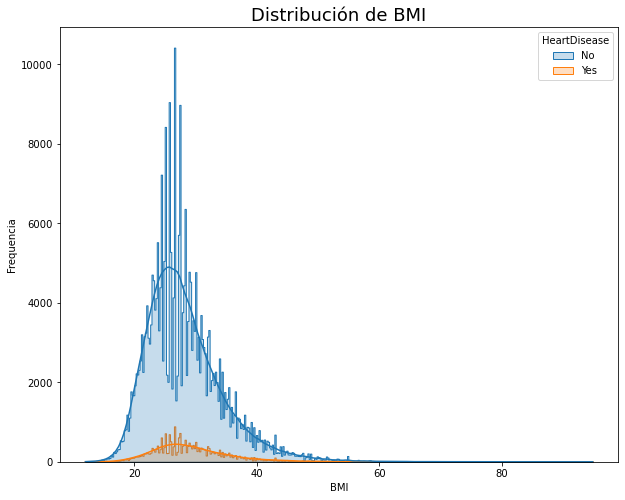

In [25]:
Distribucion(df,'BMI','HeartDisease')
#Distribucion_atributo(df,df['BMI'],atri_decision)

# Normalización

In [14]:
def norm_medias(df_m):
    df_min_m = df_m.min() 
    df_max_m = df_m.max()
    df_mean_m = df_m.mean()
    df_nm = (df_m - df_mean_m) / (df_max_m - df_min_m)
    return df_nm

In [15]:
#lim_sup y lim_inf son los nuevos límites
def norm_min_max(df_atributo, lim_inf, lim_sup):
    df_atri_min = df_atributo.min()
    df_atri_max = df_atributo.max()
    rango = lim_sup - lim_inf
    df_norm_min_max = (((df_atributo - df_atri_min)/(df_atri_max - df_atri_min)) * rango) + lim_inf
    return df_norm_min_max

In [16]:
def norm_z_score(df_z):
    df_z_mean = df_z.mean()
    df_z_std = df_z.std() 
    df_nz = (df_z - df_z_mean) / df_z_std
    return df_nz

#### Distribución de atributo BMI normalización z-score

In [29]:
atributo_norm_z_score = norm_z_score(df['BMI'])

In [21]:
atri_decision = df['HeartDisease']

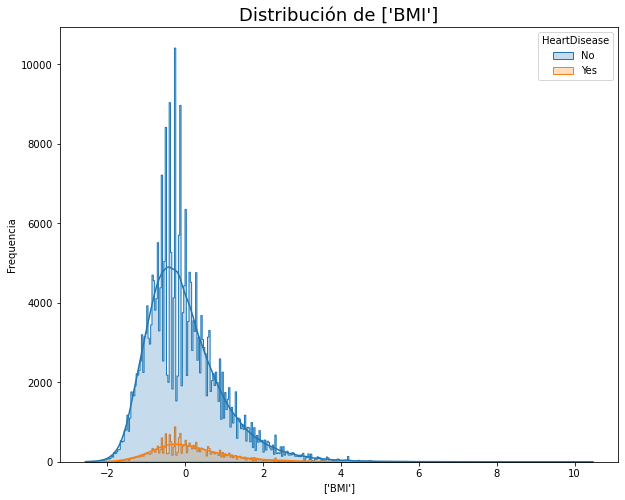

In [31]:
Distribucion_atributo(df,atributo_norm_z_score,atri_decision)

#### Distribución de atributo BMI normalización minmax

In [19]:
atributo_norm_minmax = norm_min_max(df['BMI'],0,1)

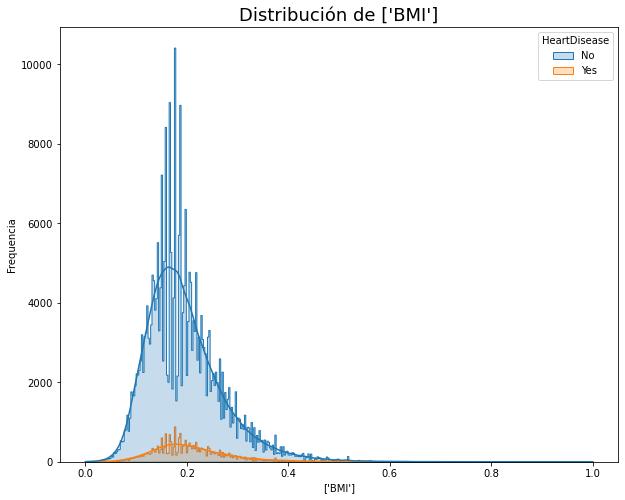

In [22]:
Distribucion_atributo(df,atributo_norm_minmax,atri_decision)

#### Distribución de atributo BMI normalización por medias

In [34]:
atributo_norm_medias = norm_medias(df['BMI'])

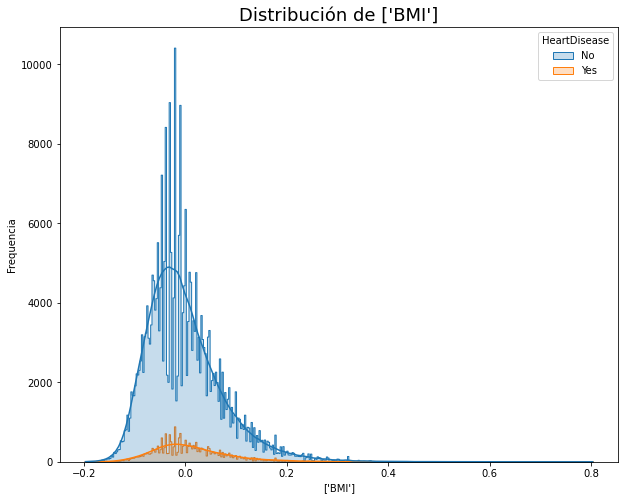

In [35]:
Distribucion_atributo(df,atributo_norm_medias,atri_decision)

# Generar datos faltantes

def Faltantes(dataf):
    df_ = dataf.copy()
    faltantes_df = df_.isnull().sum()
    print(f'Datos faltantes por atributo:\n{faltantes_df}')

    if faltantes_df.sum() != 0:
      #calcular el porcentaje de datos faltantes
      num_instancias = df_.shape[0]
      percent = (faltantes_df/num_instancias)*100
      print('Porcentaje de datos faltantes por atributo %\n', percent)
    
      co = df_.columns.tolist()
      lista = []
      for column in co:
        if percent[column] >= 60:
          lista.append(column)
          print(f'El porcentaje de datos faltantes de los atributos: {lista} es mayor al 60%, se recomienda eliminar el atributo')

    else:
      print('No hay datos faltantes')
      yn = input('¿Desea asignar valores faltantes? (si/no) ')
      if yn == 'si':
        atributo_ = input('¿Qué atributo desea trabajar? ')
        opcion = float(input('¿Qué porcentaje de datos desea de datos faltantes? Agregar solo número del 0 al 100: '))
        long = df_[atributo_].shape[0]
        indices = random.sample(range(0, long - 1), int((opcion*long)/100))
        df_[atributo_][indices] = np.nan
    return df_

In [14]:
def Faltantes(dataf):
    df_ = dataf.copy()
    faltantes_df = df_.isnull().sum()
    print(f'Datos faltantes por atributo:\n{faltantes_df}')

    if faltantes_df.sum() != 0:
      #calcular el porcentaje de datos faltantes
      num_instancias = df_.shape[0]
      percent = (faltantes_df/num_instancias)*100
      print('Porcentaje de datos faltantes por atributo %\n', percent)
    
      co = df_.columns.tolist()
      lista = []
      for column in co:
        if percent[column] >= 60:
          lista.append(column)
          print(f'El porcentaje de datos faltantes de los atributos: {lista} es mayor al 60%, se recomienda eliminar el atributo')
      yn = input('¿Desea asignar valores faltantes? (si/no) ')
      if yn == 'si':
        atributo_ = input('¿Qué atributo desea trabajar? ')
        opcion = float(input('¿Qué porcentaje de datos desea de datos faltantes? Agregar solo número del 0 al 100: '))
        long = df_[atributo_].shape[0]
        indices = random.sample(range(0, long - 1), int((opcion*long)/100))
        df_[atributo_][indices] = np.nan
    else:
      print('No hay datos faltantes')
      yn = input('¿Desea asignar valores faltantes? (si/no) ')
      if yn == 'si':
        atributo_ = input('¿Qué atributo desea trabajar? ')
        opcion = float(input('¿Qué porcentaje de datos desea de datos faltantes? Agregar solo número del 0 al 100: '))
        long = df_[atributo_].shape[0]
        indices = random.sample(range(0, long - 1), int((opcion*long)/100))
        df_[atributo_][indices] = np.nan
    return df_

In [390]:
Datos_Faltantes(df)

Datos faltantes por atributo:
 HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


No hay datos faltantes en el dataframe original

# Cargar dataset codificado

In [17]:
#/content/drive/MyDrive/Machine_Learning/Tarea01/heart_2020_cleaned (1).csv
#/content/drive/MyDrive/Machine_Learning/Tarea01/codificado_noindex (1).csv
#/content/drive/MyDrive/Machine_Learning/HeartDisease.csv
#codificado_noindex.csv
df_codificado = cargar_df()

Ingresar ruta de acceso del archivo codificado_noindex.csv
Ingresar caracter de separación: ,


In [88]:
df_codificado = df_codificado.astype('float32')

In [19]:
df_codificado.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            0    0            3     0         1   
1           0.0            0    0            5     0         0   
2          30.0            0    1            0     0         1   
3           0.0            0    0            7     0         0   
4           0.0            1    0            9     0         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 0          0        5.0       1              0           1  
1                 0          0        7.0       0              0           0  
2                 0          3        8.0       1              0           0  
3                 1          1        6.0       0              0           1  
4                 0          0        8.0       0              0           0

##### Reducción del dataset original para la imputación KNN

In [37]:
df_codificado.shape

(319795, 18)

In [19]:
df_k = df_codificado.copy()

In [20]:
df_k.drop(range(4999,319794,1),axis = 0, inplace = True)

In [21]:
df_k.shape

(5000, 18)

In [22]:
df_k.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            0    0            3     0         1   
1           0.0            0    0            5     0         0   
2          30.0            0    1            0     0         1   
3           0.0            0    0            7     0         0   
4           0.0            1    0            9     0         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 0          0        5.0       1              0           1  
1                 0          0        7.0       0              0           0  
2                 0          3        8.0       1              0           0  
3                 1          1        6.0       0              0           1  
4                 0          0        8.0       0              0           0

In [24]:
df_k_norm = norm_min_max(df_k,0,1)

In [25]:
df_k_norm.head()

HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0           0.0  0.065046      1.0              0.0     0.0        0.100000   
1           0.0  0.124092      0.0              0.0     1.0        0.000000   
2           0.0  0.222608      1.0              0.0     0.0        0.666667   
3           0.0  0.185191      0.0              0.0     0.0        0.000000   
4           0.0  0.177297      0.0              0.0     0.0        0.933333   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0           1.0          0.0  0.0     0.250000   0.0  0.333333   
1           0.0          0.0  0.0     0.416667   0.0  0.000000   
2           1.0          0.0  1.0     0.000000   0.0  0.333333   
3           0.0          0.0  0.0     0.583333   0.0  0.000000   
4           0.0          1.0  0.0     0.750000   0.0  0.000000   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0               0.0       0.00   0.210526     1.0            0.0         1.0  
1               0.0       0.00   0.315789     0.0            0.0         0.0  
2               0.0       0.75   0.368421     1.0            0.0         0.0  
3               1.0       0.25   0.263158     0.0            0.0         1.0  
4               0.0       0.00   0.368421     0.0            0.0         0.0

# Datos faltantes

##### Generando de datos faltantes en df_k para técnica knn

In [23]:
df_falta_1 = Faltantes(df_k)

Datos faltantes por atributo:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64
No hay datos faltantes


¿Desea asignar valores faltantes? (si/no)  si
¿Qué atributo desea trabajar?  BMI
¿Qué porcentaje de datos desea de datos faltantes? Agregar solo número del 0 al 100:  50


C:\Users\sleyv\AppData\Local\Temp\ipykernel_14788\3940331037.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[atributo_][indices] = np.nan


In [29]:
df_falta_2 = Faltantes(df_falta_2)

Datos faltantes por atributo:
HeartDisease           0
BMI                 2500
Smoking              750
AlcoholDrinking        0
Stroke              1000
PhysicalHealth         0
MentalHealth           0
DiffWalking            0
Sex                    0
AgeCategory            0
Race                1500
Diabetic               0
PhysicalActivity       0
GenHealth            500
SleepTime              0
Asthma                 0
KidneyDisease          0
SkinCancer             0
dtype: int64
Porcentaje de datos faltantes por atributo %
 HeartDisease         0.0
BMI                 50.0
Smoking             15.0
AlcoholDrinking      0.0
Stroke              20.0
PhysicalHealth       0.0
MentalHealth         0.0
DiffWalking          0.0
Sex                  0.0
AgeCategory          0.0
Race                30.0
Diabetic             0.0
PhysicalActivity     0.0
GenHealth           10.0
SleepTime            0.0
Asthma               0.0
KidneyDisease        0.0
SkinCancer           0.0
dtype: floa

¿Desea asignar valores faltantes? (si/no)  si
¿Qué atributo desea trabajar?  Diabetic
¿Qué porcentaje de datos desea de datos faltantes? Agregar solo número del 0 al 100:  50


C:\Users\sleyv\AppData\Local\Temp\ipykernel_14788\3940331037.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[atributo_][indices] = np.nan


##### Normalización del dataset codificado

In [393]:
df_cod_norm = norm_min_max(df_codificado,0,1)

In [394]:
df_cod_norm.head(10)

HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0           0.0  0.055294      1.0              0.0     0.0        0.100000   
1           0.0  0.100447      0.0              0.0     1.0        0.000000   
2           0.0  0.175782      1.0              0.0     0.0        0.666667   
3           0.0  0.147169      0.0              0.0     0.0        0.000000   
4           0.0  0.141132      0.0              0.0     0.0        0.933333   
5           1.0  0.203429      1.0              0.0     0.0        0.200000   
6           0.0  0.116021      0.0              0.0     0.0        0.500000   
7           0.0  0.236871      1.0              0.0     0.0        0.166667   
8           0.0  0.174212      0.0              0.0     0.0        0.000000   
9           0.0  0.346131      0.0              0.0     0.0        0.000000   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0           1.0          0.0  0.0     0.250000   0.0  0.333333   
1           0.0          0.0  0.0     0.416667   0.0  0.000000   
2           1.0          0.0  1.0     0.000000   0.0  0.333333   
3           0.0          0.0  0.0     0.583333   0.0  0.000000   
4           0.0          1.0  0.0     0.750000   0.0  0.000000   
5           0.0          1.0  0.0     0.583333   0.4  0.000000   
6           0.0          0.0  0.0     0.166667   0.0  0.000000   
7           0.0          1.0  0.0     0.416667   0.0  0.333333   
8           0.0          0.0  0.0     0.416667   0.0  0.666667   
9           0.0          1.0  1.0     0.000000   0.0  0.000000   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0               0.0       0.00   0.173913     1.0            0.0         1.0  
1               0.0       0.00   0.260870     0.0            0.0         0.0  
2               0.0       0.75   0.304348     1.0            0.0         0.0  
3               1.0       0.25   0.217391     0.0            0.0         1.0  
4               0.0       0.00   0.304348     0.0            0.0         0.0  
5               1.0       0.75   0.478261     0.0            0.0         0.0  
6               0.0       0.75   0.130435     1.0            0.0         1.0  
7               1.0       0.25   0.347826     1.0            0.0         0.0  
8               1.0       0.75   0.173913     0.0            1.0         0.0  
9               0.0       0.25   0.391304     0.0            0.0         0.0

##### Generando datos faltantes en df_codificado (10,25,50 Y 60%)

In [539]:
df_falta_ = Faltantes(df_cod_norm)

Datos faltantes por atributo:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64
No hay datos faltantes


¿Desea asignar valores faltantes? (si/no)  si
¿Qué atributo desea trabajar?  BMI
¿Qué porcentaje de datos desea de datos faltantes? Agregar solo número del 0 al 100:  50


##### Comprobando cantidad de valores faltantes

In [540]:
Datos_Faltantes(df_falta_)

Datos faltantes por atributo:
 HeartDisease             0
BMI                 159897
Smoking                  0
AlcoholDrinking          0
Stroke                   0
PhysicalHealth           0
MentalHealth             0
DiffWalking              0
Sex                      0
AgeCategory              0
Race                     0
Diabetic                 0
PhysicalActivity         0
GenHealth                0
SleepTime                0
Asthma                   0
KidneyDisease            0
SkinCancer               0
dtype: int64


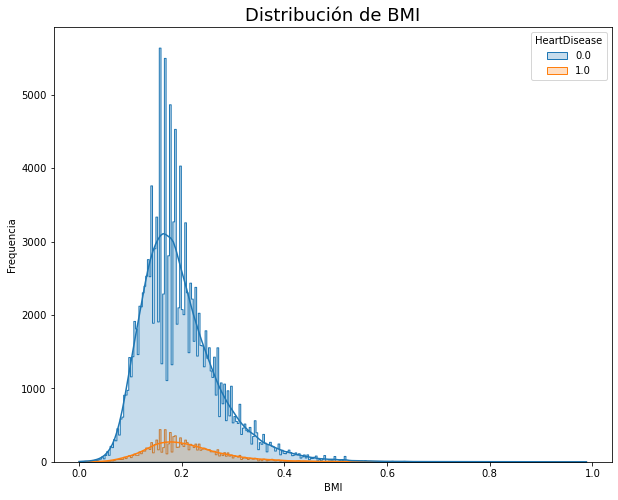

In [541]:
Distribucion(df_falta_,'BMI','HeartDisease')

In [399]:
#df_falta_3 = Faltantes(df_falta_)

In [400]:
#Datos_Faltantes(df_falta_3)

<AxesSubplot:>

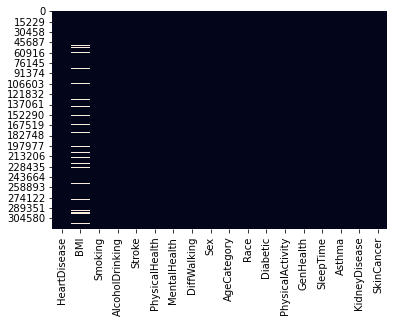

In [403]:
sns.heatmap(df_falta_.isnull(), cbar=False)

In [534]:
df_falta_.head(10)

HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0           0.0  0.055294      1.0              0.0     0.0        0.100000   
1           0.0  0.100447      0.0              0.0     1.0        0.000000   
2           0.0       NaN      1.0              0.0     0.0        0.666667   
3           0.0  0.147169      0.0              0.0     0.0        0.000000   
4           0.0  0.141132      0.0              0.0     0.0        0.933333   
5           1.0       NaN      1.0              0.0     0.0        0.200000   
6           0.0       NaN      0.0              0.0     0.0        0.500000   
7           0.0  0.236871      1.0              0.0     0.0        0.166667   
8           0.0  0.174212      0.0              0.0     0.0        0.000000   
9           0.0  0.346131      0.0              0.0     0.0        0.000000   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0           1.0          0.0  0.0     0.250000   0.0  0.333333   
1           0.0          0.0  0.0     0.416667   0.0  0.000000   
2           1.0          0.0  1.0     0.000000   0.0  0.333333   
3           0.0          0.0  0.0     0.583333   0.0  0.000000   
4           0.0          1.0  0.0     0.750000   0.0  0.000000   
5           0.0          1.0  0.0     0.583333   0.4  0.000000   
6           0.0          0.0  0.0     0.166667   0.0  0.000000   
7           0.0          1.0  0.0     0.416667   0.0  0.333333   
8           0.0          0.0  0.0     0.416667   0.0  0.666667   
9           0.0          1.0  1.0     0.000000   0.0  0.000000   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0               0.0       0.00   0.173913     1.0            0.0         1.0  
1               0.0       0.00   0.260870     0.0            0.0         0.0  
2               0.0       0.75   0.304348     1.0            0.0         0.0  
3               1.0       0.25   0.217391     0.0            0.0         1.0  
4               0.0       0.00   0.304348     0.0            0.0         0.0  
5               1.0       0.75   0.478261     0.0            0.0         0.0  
6               0.0       0.75   0.130435     1.0            0.0         1.0  
7               1.0       0.25   0.347826     1.0            0.0         0.0  
8               1.0       0.75   0.173913     0.0            1.0         0.0  
9               0.0       0.25   0.391304     0.0            0.0         0.0

# Imputación por medias


##### Resultado de haber utilizado función Faltantes


In [406]:
def imputacion_media(df_,atributo_):
  dfi = df_.copy()
  check_for_nan = dfi[atributo_].isnull().values.any()
  if check_for_nan == False:
    print('No hay datos faltantes')
  media_atr = dfi[atributo_].mean()
  dfi[atributo_] = dfi[atributo_].fillna(media_atr)

  return dfi

In [437]:
df_imedia = imputacion_media(df_falta_,'PhysicalHealth')

No hay datos faltantes


In [438]:
df_imedia_bmi = imputacion_media(df_falta_,'BMI')

In [439]:
df_imedia_bmi

HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  \
0                0.0  0.055294      1.0              0.0     0.0   
1                0.0  0.196839      0.0              0.0     1.0   
2                0.0  0.196839      1.0              0.0     0.0   
3                0.0  0.196839      0.0              0.0     0.0   
4                0.0  0.141132      0.0              0.0     0.0   
...              ...       ...      ...              ...     ...   
319790           1.0  0.196839      1.0              0.0     0.0   
319791           0.0  0.215139      1.0              0.0     0.0   
319792           0.0  0.196839      0.0              0.0     0.0   
319793           0.0  0.196839      0.0              0.0     0.0   
319794           0.0  0.416999      0.0              0.0     0.0   

        PhysicalHealth  MentalHealth  DiffWalking  Sex  AgeCategory  Race  \
0             0.100000           1.0          0.0  0.0     0.250000   0.0   
1             0.000000           0.0          0.0  0.0     0.416667   0.0   
2             0.666667           1.0          0.0  1.0     0.000000   0.0   
3             0.000000           0.0          0.0  0.0     0.583333   0.0   
4             0.933333           0.0          1.0  0.0     0.750000   0.0   
...                ...           ...          ...  ...          ...   ...   
319790        0.233333           0.0          1.0  1.0     0.083333   0.2   
319791        0.000000           0.0          0.0  1.0     0.833333   0.2   
319792        0.000000           0.0          0.0  0.0     0.500000   0.2   
319793        0.000000           0.0          0.0  0.0     1.000000   0.2   
319794        0.000000           0.0          0.0  0.0     0.416667   0.2   

        Diabetic  PhysicalActivity  GenHealth  SleepTime  Asthma  \
0       0.333333               0.0       0.00   0.173913     1.0   
1       0.000000               0.0       0.00   0.260870     0.0   
2       0.333333               0.0       0.75   0.304348     1.0   
3       0.000000               1.0       0.25   0.217391     0.0   
4       0.000000               0.0       0.00   0.304348     0.0   
...          ...               ...        ...        ...     ...   
319790  0.333333               1.0       0.75   0.217391     1.0   
319791  0.000000               0.0       0.00   0.173913     1.0   
319792  0.000000               0.0       0.25   0.217391     0.0   
319793  0.000000               1.0       0.25   0.478261     0.0   
319794  0.000000               0.0       0.25   0.304348     0.0   

        KidneyDisease  SkinCancer  
0                 0.0         1.0  
1                 0.0         0.0  
2                 0.0         0.0  
3                 0.0         1.0  
4                 0.0         0.0  
...               ...         ...  
319790            0.0         0.0  
319791            0.0         0.0  
319792            0.0         0.0  
319793            0.0         0.0  
319794            0.0         0.0  

[319795 rows x 18 columns]

In [427]:
Datos_Faltantes(df_imedia_bmi['BMI'])

Datos faltantes por atributo:
 0


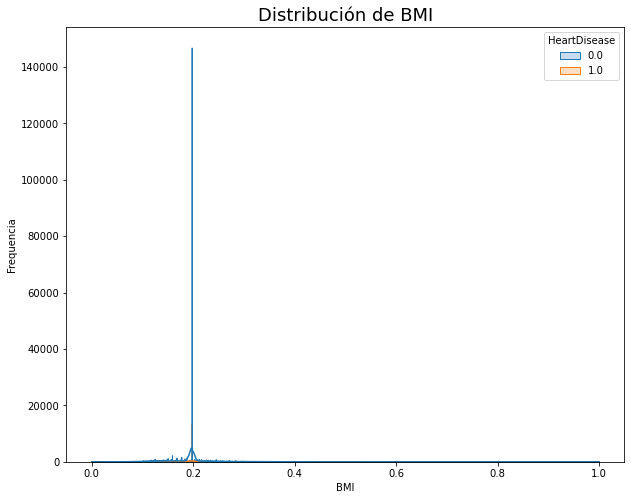

In [440]:
#Distribucion_atributo(df,atributo_norm_medias,atri_decision)
Distribucion(df_imedia_bmi,'BMI','HeartDisease')

# Imputación por moda

In [472]:
df_codificado.head(10)

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   
5             1  28.87        1                0       0             6.0   
6             0  21.63        0                0       0            15.0   
7             0  31.64        1                0       0             5.0   
8             0  26.45        0                0       0             0.0   
9             0  40.69        0                0       0             0.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            0    0            3     0         1   
1           0.0            0    0            5     0         0   
2          30.0            0    1            0     0         1   
3           0.0            0    0            7     0         0   
4           0.0            1    0            9     0         0   
5           0.0            1    0            7     2         0   
6           0.0            0    0            2     0         0   
7           0.0            1    0            5     0         1   
8           0.0            0    0            5     0         2   
9           0.0            1    1            0     0         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 0          0        5.0       1              0           1  
1                 0          0        7.0       0              0           0  
2                 0          3        8.0       1              0           0  
3                 1          1        6.0       0              0           1  
4                 0          0        8.0       0              0           0  
5                 1          3       12.0       0              0           0  
6                 0          3        4.0       1              0           1  
7                 1          1        9.0       1              0           0  
8                 1          3        5.0       0              1           0  
9                 0          1       10.0       0              0           0

In [490]:
df_falta_moda = Faltantes(df_codificado)

Datos faltantes por atributo:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64
No hay datos faltantes


¿Desea asignar valores faltantes? (si/no)  si
¿Qué atributo desea trabajar?  Race
¿Qué porcentaje de datos desea de datos faltantes? Agregar solo número del 0 al 100:  50


C:\Users\sleyv\AppData\Local\Temp\ipykernel_14436\3940331037.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[atributo_][indices] = np.nan


In [491]:
Datos_Faltantes(df_falta_moda)

Datos faltantes por atributo:
 HeartDisease             0
BMI                      0
Smoking                  0
AlcoholDrinking          0
Stroke                   0
PhysicalHealth           0
MentalHealth             0
DiffWalking              0
Sex                      0
AgeCategory              0
Race                159897
Diabetic                 0
PhysicalActivity         0
GenHealth                0
SleepTime                0
Asthma                   0
KidneyDisease            0
SkinCancer               0
dtype: int64


In [492]:
df_falta_moda.head(10)

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   
5             1  28.87        1                0       0             6.0   
6             0  21.63        0                0       0            15.0   
7             0  31.64        1                0       0             5.0   
8             0  26.45        0                0       0             0.0   
9             0  40.69        0                0       0             0.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            0    0            3   0.0         1   
1           0.0            0    0            5   0.0         0   
2          30.0            0    1            0   NaN         1   
3           0.0            0    0            7   NaN         0   
4           0.0            1    0            9   0.0         0   
5           0.0            1    0            7   2.0         0   
6           0.0            0    0            2   0.0         0   
7           0.0            1    0            5   0.0         1   
8           0.0            0    0            5   NaN         2   
9           0.0            1    1            0   0.0         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 0          0        5.0       1              0           1  
1                 0          0        7.0       0              0           0  
2                 0          3        8.0       1              0           0  
3                 1          1        6.0       0              0           1  
4                 0          0        8.0       0              0           0  
5                 1          3       12.0       0              0           0  
6                 0          3        4.0       1              0           1  
7                 1          1        9.0       1              0           0  
8                 1          3        5.0       0              1           0  
9                 0          1       10.0       0              0           0

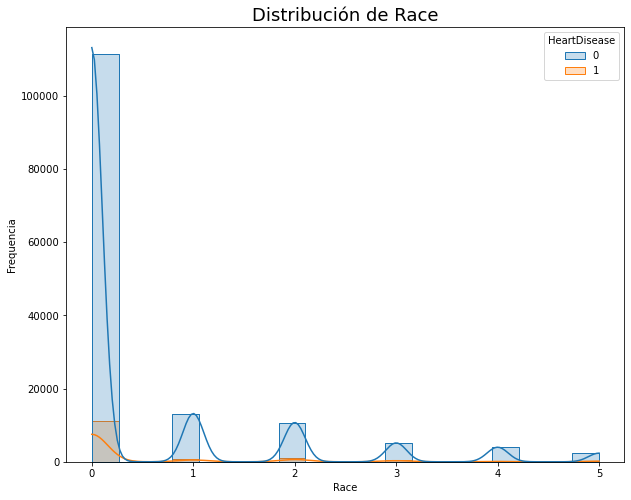

In [493]:
Distribucion(df_falta_moda,'Race','HeartDisease')

In [479]:
def imputacion_moda(df_,atributo_):
  dfi = df_.copy()
  check_for_nan = dfi[atributo_].isnull().values.any()
  if check_for_nan == False:
    print('No hay datos faltantes')
  moda = dfi[atributo_].mode()
  moda_atr = moda[0]
  print(moda_atr)
  dfi[atributo_] = dfi[atributo_].fillna(moda_atr)

  return dfi

In [494]:
df_imputacion_moda = imputacion_moda(df_falta_moda,'Race')

0.0


In [495]:
df_imputacion_moda.head(10)

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   
5             1  28.87        1                0       0             6.0   
6             0  21.63        0                0       0            15.0   
7             0  31.64        1                0       0             5.0   
8             0  26.45        0                0       0             0.0   
9             0  40.69        0                0       0             0.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            0    0            3   0.0         1   
1           0.0            0    0            5   0.0         0   
2          30.0            0    1            0   0.0         1   
3           0.0            0    0            7   0.0         0   
4           0.0            1    0            9   0.0         0   
5           0.0            1    0            7   2.0         0   
6           0.0            0    0            2   0.0         0   
7           0.0            1    0            5   0.0         1   
8           0.0            0    0            5   0.0         2   
9           0.0            1    1            0   0.0         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 0          0        5.0       1              0           1  
1                 0          0        7.0       0              0           0  
2                 0          3        8.0       1              0           0  
3                 1          1        6.0       0              0           1  
4                 0          0        8.0       0              0           0  
5                 1          3       12.0       0              0           0  
6                 0          3        4.0       1              0           1  
7                 1          1        9.0       1              0           0  
8                 1          3        5.0       0              1           0  
9                 0          1       10.0       0              0           0

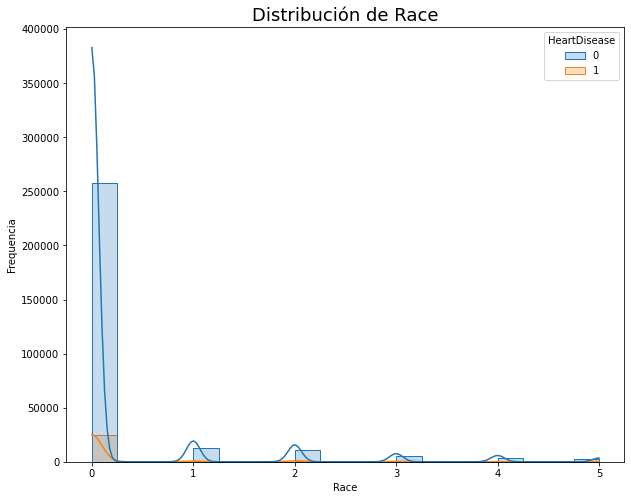

In [496]:
Distribucion(df_imputacion_moda,'Race','HeartDisease')

# Imputación por media de clases

In [522]:
def imputacion_media_clases(df_, atributo_imputacion, atributo_d):
  df_mc = df_.copy()
  check_for_nan = df_mc[atributo_imputacion].isnull().values.any()
  if check_for_nan == False:
    print('No hay datos faltantes')

  c = df_mc[atributo_d]
  cl = c.value_counts()
  clases = list(cl.index)
  
  for i in range(len(clases)):
    inst_ = df_mc[df_mc[atributo_d] == clases[i]]
    print(clases[i])
    media_clase = inst_[atributo_imputacion].mean()
    df_mc[atributo_imputacion] = df_mc[atributo_imputacion].fillna(media_clase)
    print(media_clase)

  return df_mc

In [523]:
df_mediac = imputacion_media_clases(df_falta_,'BMI','HeartDisease')
df_mediac

0.0
0.1956398378651265
1.0
0.206248181498345


HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  \
0                0.0  0.055294      1.0              0.0     0.0   
1                0.0  0.100447      0.0              0.0     1.0   
2                0.0  0.175782      1.0              0.0     0.0   
3                0.0  0.147169      0.0              0.0     0.0   
4                0.0  0.141132      0.0              0.0     0.0   
...              ...       ...      ...              ...     ...   
319790           1.0  0.195640      1.0              0.0     0.0   
319791           0.0  0.215139      1.0              0.0     0.0   
319792           0.0  0.147531      0.0              0.0     0.0   
319793           0.0  0.250996      0.0              0.0     0.0   
319794           0.0  0.416999      0.0              0.0     0.0   

        PhysicalHealth  MentalHealth  DiffWalking  Sex  AgeCategory  Race  \
0             0.100000           1.0          0.0  0.0     0.250000   0.0   
1             0.000000           0.0          0.0  0.0     0.416667   0.0   
2             0.666667           1.0          0.0  1.0     0.000000   0.0   
3             0.000000           0.0          0.0  0.0     0.583333   0.0   
4             0.933333           0.0          1.0  0.0     0.750000   0.0   
...                ...           ...          ...  ...          ...   ...   
319790        0.233333           0.0          1.0  1.0     0.083333   0.2   
319791        0.000000           0.0          0.0  1.0     0.833333   0.2   
319792        0.000000           0.0          0.0  0.0     0.500000   0.2   
319793        0.000000           0.0          0.0  0.0     1.000000   0.2   
319794        0.000000           0.0          0.0  0.0     0.416667   0.2   

        Diabetic  PhysicalActivity  GenHealth  SleepTime  Asthma  \
0       0.333333               0.0       0.00   0.173913     1.0   
1       0.000000               0.0       0.00   0.260870     0.0   
2       0.333333               0.0       0.75   0.304348     1.0   
3       0.000000               1.0       0.25   0.217391     0.0   
4       0.000000               0.0       0.00   0.304348     0.0   
...          ...               ...        ...        ...     ...   
319790  0.333333               1.0       0.75   0.217391     1.0   
319791  0.000000               0.0       0.00   0.173913     1.0   
319792  0.000000               0.0       0.25   0.217391     0.0   
319793  0.000000               1.0       0.25   0.478261     0.0   
319794  0.000000               0.0       0.25   0.304348     0.0   

        KidneyDisease  SkinCancer  
0                 0.0         1.0  
1                 0.0         0.0  
2                 0.0         0.0  
3                 0.0         1.0  
4                 0.0         0.0  
...               ...         ...  
319790            0.0         0.0  
319791            0.0         0.0  
319792            0.0         0.0  
319793            0.0         0.0  
319794            0.0         0.0  

[319795 rows x 18 columns]

Ya no hay datos faltantes en el atributo

In [524]:
Datos_Faltantes(df_mediac['BMI'])

Datos faltantes por atributo:
 0


Distribución del atributo en el conjunto de datos con valores faltantes

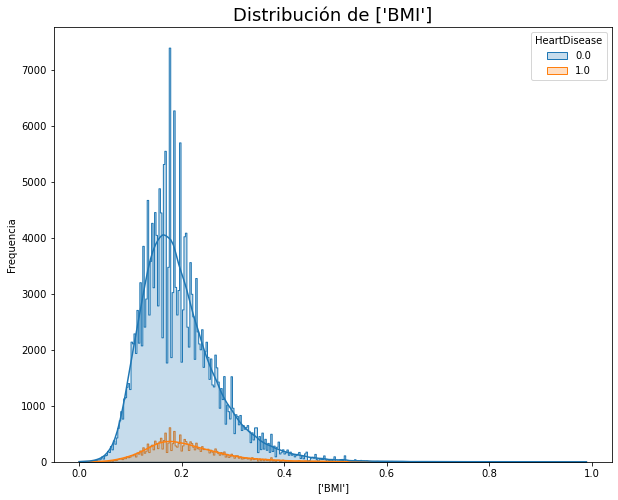

In [525]:
Distribucion_atributo(df_falta_,df_falta_['BMI'],df_falta_['HeartDisease'])

Distribución del atributo en el dataset original

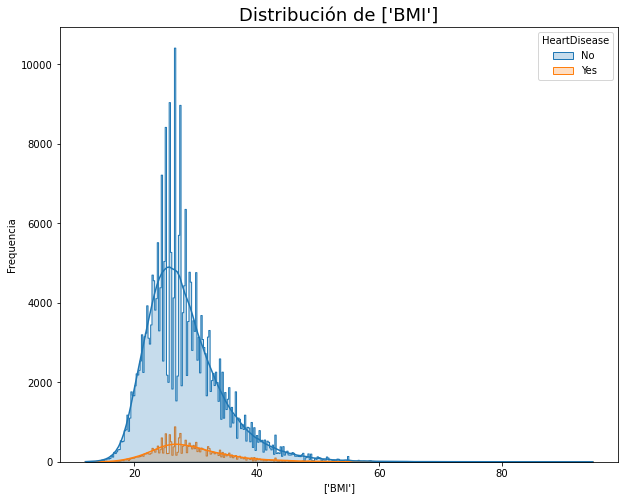

In [112]:
Distribucion_atributo(df,df['BMI'],df['HeartDisease'])

Comparación de medias entre el dataset original y el dataset con valores faltantes despúes de realizar la imputación por medias

In [515]:
df_mediac['BMI'].mean()

0.19633061266713814

In [516]:
df['BMI'].mean()

28.325398520926328

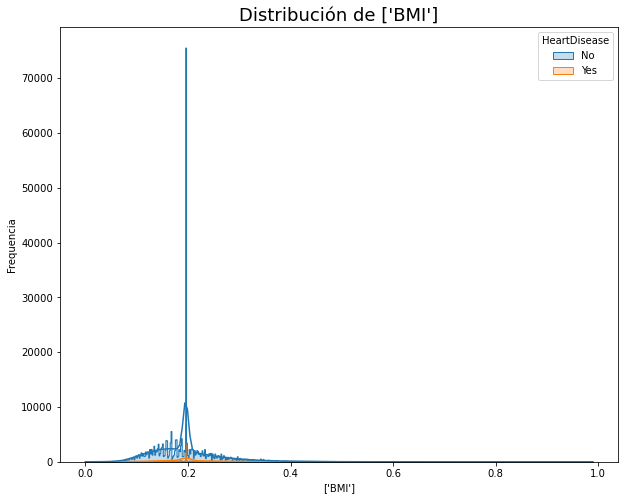

In [526]:
Distribucion_atributo(df_mediac,df_mediac['BMI'],df['HeartDisease'])

# Imputación por regresión

Text(0, 0.5, 'HeartDisease')

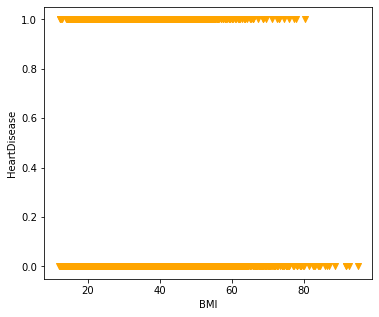

In [117]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.scatter(df_falta_['BMI'],df_falta_['HeartDisease'],color='orange',marker="v")
plt.xlabel('BMI')
plt.ylabel('HeartDisease')

In [118]:
x_tn = df_falta_[df_falta_['BMI'].notnull()]
#x_train_index = df_falta_.index[df_falta_.isnull()].tolist()
x_train_ = x_tn.drop(['BMI'], axis=1)
type(x_train_)

pandas.core.frame.DataFrame

In [119]:
y_train = x_tn['BMI']

In [120]:
y_train.mean()

28.34239959716797

In [121]:
#x_train_index = df_falta_.index[df_falta_['BMI'].isnull()].tolist()
#x_train_index

In [122]:
#x_train = df_falta_[df_falta_['BMI'].notnull()]['BMI']
#x_train
#x_train_index = df_falta_.index[df_falta_['BMI'].notnull()].tolist()

In [123]:
x_f = df_falta_[df_falta_['BMI'].isnull()]
x_faltantes = x_f.drop(['BMI'], axis=1)

In [124]:
x_train_.min()

HeartDisease        0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           1.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float32

In [54]:
def norm_medias(df_m):
    df_min_m = df_m.min() 
    df_max_m = df_m.max()
    df_mean_m = df_m.mean()
    df_nm = (df_m - df_mean_m) / (df_max_m - df_min_m)
    return df_nm

In [55]:
def method_602020(x,y):

  train_x = x[0 : int(len(x)*0.6)]
  train_y = y[0 : int(len(y)*0.6)]

  val_x = x[int(len(x)*0.6) : int(len(x)*0.8)]
  val_y = y[int(len(y)*0.6) : int(len(y)*0.8)]

  test_x = x[int(len(x)*0.8) : ]
  test_y = y[int(len(y)*0.8) : ]
  
  return train_x, train_y, val_x, val_y, test_x, test_y

In [56]:
x_norm = norm_min_max(x_train_,0, 1)

In [57]:
y_norm = norm_min_max(y_train,0, 1)

In [58]:
train_x, train_y, val_x, val_y, test_x, test_y = method_602020(x_norm,y_norm)

In [35]:
def regre_logistica(x, y, theta, alpha, epocas):
 
  for i in tqdm(range(epocas)):

    Z = np.dot(x,theta)
    ft = 1 / (1 + np.exp(-Z))
    dJ = (1/len(x)) * np.dot(np.transpose(x),(ft - y))
    theta = theta - alpha * dJ
    
    return theta


In [218]:
def clasificacion(x,theta):
    Z = np.dot(x,theta)
    ft = 1 / (1 + np.exp(-Z))
    clas = np.round(ft)
    return clas

In [219]:
def accuracy(ycalculada, yreal):
  #coincidencias = (ycalculada == yreal)
  coincidencias = np.equal(ycalculada, yreal)
  totalcoin = np.sum(coincidencias)
  porcentaje = (totalcoin/len(ycalculada))*100
  return porcentaje

In [213]:
def MSE(x, y, theta):

  h = np.dot(x,theta)
  J = np.sum((h-y)**2)/(2 * (len(h)))

  return J

In [59]:
alpha = 0.5
epocas = 2
theta = (np.random.rand(x_norm.shape[1],1))
theta = theta.astype('float32')
print(theta)

[[0.34099478]
 [0.60658467]
 [0.36126444]
 [0.686382  ]
 [0.48626986]
 [0.7016552 ]
 [0.89463115]
 [0.6730752 ]
 [0.90080106]
 [0.46570385]
 [0.4619137 ]
 [0.5452718 ]
 [0.06346495]
 [0.98524415]
 [0.8461087 ]
 [0.03062353]
 [0.5546294 ]]


In [38]:
def hipotesis(xi,y, theta):
  
  hipo = np.matmul(xi,theta)
  J = np.sum((h-y)**2)/(2 * (len(h)))

  return hipo, J

In [70]:
Z = np.dot(train_x,theta)
ft = 1 / (1 + np.exp(-Z))

In [72]:
ft.shape

(95938, 1)

In [126]:
#Z = np.dot(train_x,theta)
#ft = 1 / (1 + np.exp(-Z))
#dJ = (1/len(train_x)) * np.matmul(np.transpose(train_x),(ft - train_y))
#theta = theta - alpha * dJ

In [127]:
#theta_f = regre_logistica(train_x, train_y, theta, alpha, epocas)
#print(theta_f)

In [ ]:
ycalculada = clasificacion(val_x, theta_f)
print('Exactitud Validación:',accuracy(ycalculada, val_y))

In [ ]:
yfinal = clasificacion(test_x, theta_f)
accuracy_final = accuracy(yfinal, test_y)
print('Exactitud de test:',accuracy_final)

In [ ]:
loss = MSE(test_x, yfinal, theta_f)
print('Loss:',loss)

In [54]:
def MSE(h, Y):
  return np.sum((h - Y) ** 2) / (2 * (len(h)))

def aplica_hipotesis(X, theta_0, theta_1):
  return theta_1 * X + theta_0

def costo(X, Y, theta_0, theta_1):
  h = aplica_hipotesis(X, theta_0, theta_1)
  cost = MSE(h, Y)
  return h, cost
  
def plot(X, Y, theta_0, theta_1):
  x = np.linspace(0, X.max(), len(X))
  plt.plot(X, Y, marker='.', linestyle='none', label='Y data')
  plt.plot(x, aplica_hipotesis(x, theta_0, theta_1), label='model line')
  # plt.plot(X, aplica_modelo_lineal(x, theta_0, theta_1), marker='.', linestyle='none', label='h')
  plt.legend(loc="upper left")
  plt.show()

In [55]:
def graf_rl(xi, yi, theta0, theta1):
  x = np.linspace(0, xi.max(),len(xi))
  plt.plot(xi, yi, marker='.', linestyle='none', label= 'Y data')
  plt.plot(x, aplica_hipotesis(x, theta0, theta1), label = 'Hipótesis')
  plt.suptitle('Regresión lineal')
  #plt.xlabel('Medio de comunicación')
  plt.legend(loc="upper left")
  plt.show()

In [56]:
X = np.asarray(df['BMI'])

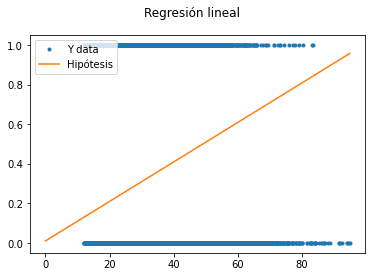

MSE =  0.06179429142381838


In [57]:
theta0, theta1 = 0.01, 0.01
X = np.asarray(df_codificado['BMI'])
Y = np.asarray(df_codificado['HeartDisease'])

h, c = costo(X, Y, theta0, theta1)
graf_rl(X, Y, theta0, theta1)

print('MSE = ', c)

df_a = df_falta_.copy()
faltantes_df = df_a['BMI'].isnull().sum()
no_faltantes = df_a[df_a['BMI'].notnull()]

min = no_faltantes['BMI'].min()
max = no_faltantes['BMI'].max()IMPUTACIÓN ALEATORIA

# Imputación aleatoria

In [30]:
def imputacion_aleatoria(df_aleat, atributo_):
    df_a = df_aleat.copy()
    faltantes_df = df_a[atributo_].isnull().sum()
    no_faltantes = df_a[df_a[atributo_].notnull()]

    min = no_faltantes[atributo_].min()
    max = no_faltantes[atributo_].max()
    
    tipo = df_a[atributo_].dtypes
    print(tipo)
    if tipo == 'O': 
      random_string_list = []
      for i, atributo in enumerate(atributo_):
        obs_ = df_a[atributo_].value_counts() #Return a Series containing counts of unique values.
        obs_l_ = list(obs_.index)            #Lista de los valores únicos encontrados
      for i in range(faltantes_df):
        x = random.choices(obs_l_)
        random_string_list.append(x)
      df_a.loc[df_a[atributo_].isnull(),atributo_] = random_string_list
   
    elif tipo == 'int64': 
      
      random_int_list = []
      for i in range(faltantes_df):
        x = random.radint(min,max)
        random_int_list.append(x)
      df_a.loc[df_a[atributo_].isnull(),atributo_] = random_int_list

    elif tipo == 'float64': 
    
      random_float_list = []
      for i in range(faltantes_df):
        x = round(random.uniform(min,max),2)
        random_float_list.append(x)
      df_a.loc[df_a[atributo_].isnull(),atributo_] = random_float_list

    return df_a


In [542]:
df_aleatorio_bmi = imputacion_aleatoria(df_falta_,'BMI')

float64


In [543]:
df_aleatorio_bmi

HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  \
0                0.0  0.620000      1.0              0.0     0.0   
1                0.0  0.490000      0.0              0.0     1.0   
2                0.0  0.175782      1.0              0.0     0.0   
3                0.0  0.710000      0.0              0.0     0.0   
4                0.0  0.141132      0.0              0.0     0.0   
...              ...       ...      ...              ...     ...   
319790           1.0  0.185802      1.0              0.0     0.0   
319791           0.0  0.830000      1.0              0.0     0.0   
319792           0.0  0.950000      0.0              0.0     0.0   
319793           0.0  0.230000      0.0              0.0     0.0   
319794           0.0  0.416999      0.0              0.0     0.0   

        PhysicalHealth  MentalHealth  DiffWalking  Sex  AgeCategory  Race  \
0             0.100000           1.0          0.0  0.0     0.250000   0.0   
1             0.000000           0.0          0.0  0.0     0.416667   0.0   
2             0.666667           1.0          0.0  1.0     0.000000   0.0   
3             0.000000           0.0          0.0  0.0     0.583333   0.0   
4             0.933333           0.0          1.0  0.0     0.750000   0.0   
...                ...           ...          ...  ...          ...   ...   
319790        0.233333           0.0          1.0  1.0     0.083333   0.2   
319791        0.000000           0.0          0.0  1.0     0.833333   0.2   
319792        0.000000           0.0          0.0  0.0     0.500000   0.2   
319793        0.000000           0.0          0.0  0.0     1.000000   0.2   
319794        0.000000           0.0          0.0  0.0     0.416667   0.2   

        Diabetic  PhysicalActivity  GenHealth  SleepTime  Asthma  \
0       0.333333               0.0       0.00   0.173913     1.0   
1       0.000000               0.0       0.00   0.260870     0.0   
2       0.333333               0.0       0.75   0.304348     1.0   
3       0.000000               1.0       0.25   0.217391     0.0   
4       0.000000               0.0       0.00   0.304348     0.0   
...          ...               ...        ...        ...     ...   
319790  0.333333               1.0       0.75   0.217391     1.0   
319791  0.000000               0.0       0.00   0.173913     1.0   
319792  0.000000               0.0       0.25   0.217391     0.0   
319793  0.000000               1.0       0.25   0.478261     0.0   
319794  0.000000               0.0       0.25   0.304348     0.0   

        KidneyDisease  SkinCancer  
0                 0.0         1.0  
1                 0.0         0.0  
2                 0.0         0.0  
3                 0.0         1.0  
4                 0.0         0.0  
...               ...         ...  
319790            0.0         0.0  
319791            0.0         0.0  
319792            0.0         0.0  
319793            0.0         0.0  
319794            0.0         0.0  

[319795 rows x 18 columns]

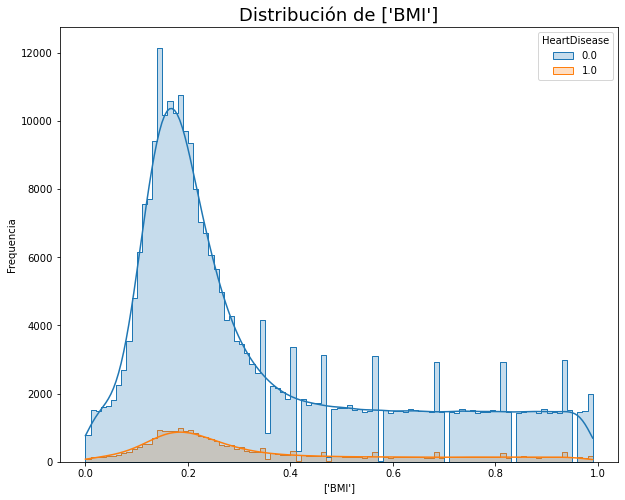

In [544]:
Distribucion_atributo(df_aleatorio_bmi,df_aleatorio_bmi['BMI'],df_aleatorio_bmi['HeartDisease'])

df[BMI].mean() = 28.325398520926328

In [153]:
df_aleatorio_bmi['BMI'].mean()

40.88199234008789

In [73]:
def box_plot_sns(df_, atributo_,atributo_d):
  fig, ax = plt.subplots(figsize = (13,8))
  print(atributo_)
  ax = sns.boxplot(x=df_[atributo_],y=df_[atributo_d], data=df_)
  ax = sns.stripplot(data=df,x="BMI", y="HeartDisease",marker='o', color='gray')
  plt.title(f'Distribución de {atributo_}', fontsize = 18)
  plt.show()

BMI


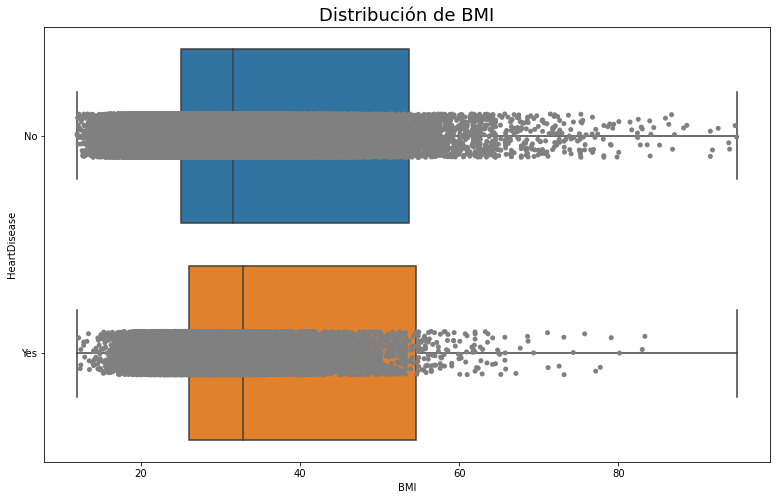

In [74]:
box_plot_sns(df_aleatorio_bmi,'BMI','HeartDisease')

In [160]:
cuartiles(df_falta_,'BMI')

Q1: 27.34000015258789, Q2: 94.8499984741211, Q3: nan


(27.34, 94.85, nan)

In [162]:
cuartiles(df_aleatorio_bmi,'BMI')

Q1: 25.100000381469727, Q2: 31.75, Q3: 53.709999084472656


(25.1, 31.75, 53.71)

In [161]:
df_aleatorio_bmi['BMI'].median()

31.75

# I. ALEATORIA PHYSICALHEALTH

In [77]:
df_aleatorio_PH = imputacion_aleatoria(df_falta_,'PhysicalHealth')

float64
float64


In [78]:
Datos_Faltantes(df_aleatorio_PH)

Datos faltantes por atributo:
 HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


PhysicalHealth


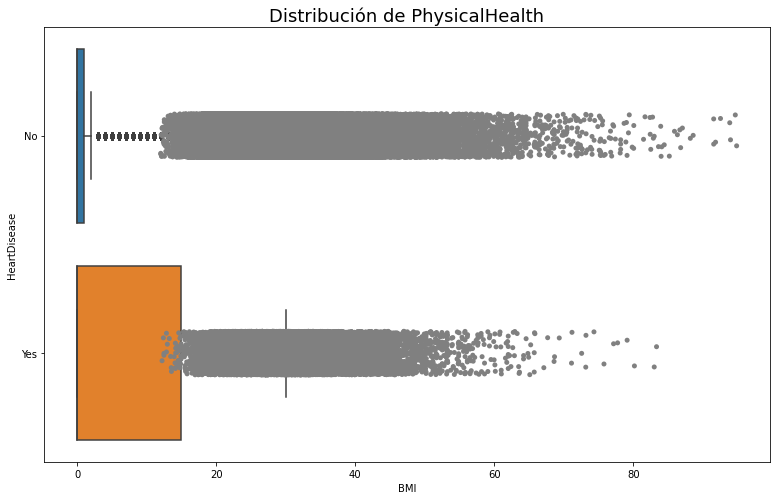

In [83]:
box_plot_sns(df_aleatorio_bmi,'PhysicalHealth','HeartDisease')

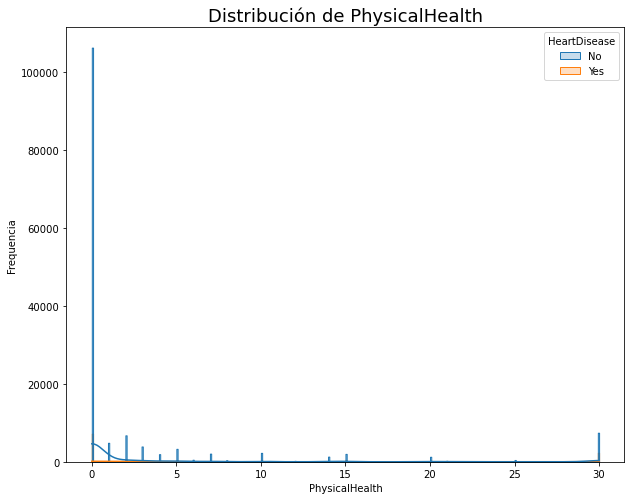

In [84]:
Distribucion(df_falta_,'PhysicalHealth','HeartDisease')

In [85]:
cuartiles(df_falta_,'PhysicalHealth')

Q1: 0.0, Q2: 30.0, Q3: nan


(0.0, 30.0, nan)

In [86]:
df_falta_['PhysicalHealth'].median()

0.0

In [82]:
num_atributos, atributos = Numero_atributos(df_aleatorio_PH)

El dataset tiene 18 atributos:
1.- HeartDisease 
2.- BMI 
3.- Smoking 
4.- AlcoholDrinking 
5.- Stroke 
6.- PhysicalHealth 
7.- MentalHealth 
8.- DiffWalking 
9.- Sex 
10.- AgeCategory 
11.- Race 
12.- Diabetic 
13.- PhysicalActivity 
14.- GenHealth 
15.- SleepTime 
16.- Asthma 
17.- KidneyDisease 
18.- SkinCancer 


In [202]:
#Observaciones(df_aleatorio_PH,atributos)

In [176]:
cuartiles(df_aleatorio_PH,'PhysicalHealth')

Q1: 0.0, Q2: 0.0, Q3: 2.0


(0.0, 0.0, 2.0)

In [177]:
df_aleatorio_PH['PhysicalHealth'].median()

0.0

In [87]:
df_aleatorio_PH['HeartDisease'].dtype

dtype('O')

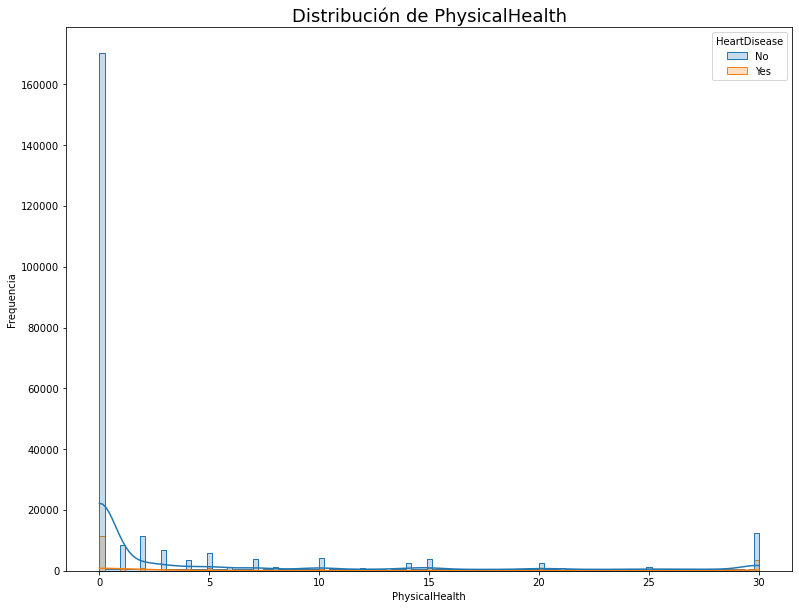

In [102]:
Distribucion_atributo(df_aleatorio_PH,df_aleatorio_PH['PhysicalHealth'],'PhysicalHealth',df_aleatorio_PH['HeartDisease'])

In [92]:
df_aleatorio_smo = imputacion_aleatoria(df_falta_,'Smoking')

object


In [93]:
Datos_Faltantes(df_aleatorio_smo)

Datos faltantes por atributo:
 HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [94]:
df_falta_.head(20)

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0            No  16.60     Yes              No     No             3.0   
1            No  20.34      No              No    Yes             0.0   
2            No  26.58     Yes              No     No            20.0   
3            No  24.21     NaN              No     No             0.0   
4            No  23.71     NaN              No     No            28.0   
5           Yes  28.87     NaN              No     No             6.0   
6            No  21.63      No              No     No            15.0   
7            No  31.64     NaN              No     No             5.0   
8            No  26.45      No              No     No             0.0   
9            No  40.69     NaN              No     No             0.0   
10          Yes  34.30     NaN              No     No            30.0   
11           No  28.71     NaN              No     No             0.0   
12           No  28.37     NaN              No     No             0.0   
13           No  28.15      No              No     No             7.0   
14           No  29.29     NaN              No     No             0.0   
15           No  29.18     NaN              No     No             1.0   
16           No  26.26      No              No     No             5.0   
17           No  22.59     Yes              No     No             0.0   
18           No  29.86     NaN              No     No             0.0   
19           No  18.13     NaN              No     No             0.0   

    MentalHealth DiffWalking     Sex  AgeCategory   Race  \
0           30.0          No  Female        55-59  White   
1            0.0          No  Female  80 or older  White   
2           30.0          No    Male        65-69  White   
3            0.0          No  Female        75-79  White   
4            0.0         Yes  Female        40-44  White   
5            0.0         Yes  Female        75-79  Black   
6            0.0          No  Female        70-74  White   
7            0.0         Yes  Female  80 or older  White   
8            0.0          No  Female  80 or older  White   
9            0.0         Yes    Male        65-69  White   
10           0.0         Yes    Male        60-64  White   
11           0.0          No  Female        55-59  White   
12           0.0         Yes    Male        75-79  White   
13           0.0         Yes  Female  80 or older  White   
14          30.0         Yes  Female        60-64  White   
15           0.0          No  Female        50-54  White   
16           2.0          No  Female        70-74  White   
17          30.0         Yes    Male        70-74  White   
18           0.0         Yes  Female        75-79  Black   
19           0.0          No    Male  80 or older  White   

                   Diabetic PhysicalActivity  GenHealth  SleepTime Asthma  \
0                       Yes              Yes  Very good        5.0    Yes   
1                        No              Yes  Very good        7.0     No   
2                       Yes              Yes       Fair        8.0    Yes   
3                        No               No       Good        6.0     No   
4                        No              Yes  Very good        8.0     No   
5                        No               No       Fair       12.0     No   
6                        No              Yes       Fair        4.0    Yes   
7                       Yes               No       Good        9.0    Yes   
8   No, borderline diabetes               No       Fair        5.0     No   
9                        No              Yes       Good       10.0     No   
10                      Yes               No       Poor       15.0    Yes   
11                       No              Yes  Very good        5.0     No   
12                      Yes              Yes  Very good        8.0     No   
13                       No               No       Good        7.0     No   
14                       No               No       Go

In [95]:
df_aleatorio_smo.head(20)

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0            No  16.60     Yes              No     No             3.0   
1            No  20.34      No              No    Yes             0.0   
2            No  26.58     Yes              No     No            20.0   
3            No  24.21     Yes              No     No             0.0   
4            No  23.71     Yes              No     No            28.0   
5           Yes  28.87     Yes              No     No             6.0   
6            No  21.63      No              No     No            15.0   
7            No  31.64     Yes              No     No             5.0   
8            No  26.45      No              No     No             0.0   
9            No  40.69      No              No     No             0.0   
10          Yes  34.30     Yes              No     No            30.0   
11           No  28.71     Yes              No     No             0.0   
12           No  28.37     Yes              No     No             0.0   
13           No  28.15      No              No     No             7.0   
14           No  29.29      No              No     No             0.0   
15           No  29.18     Yes              No     No             1.0   
16           No  26.26      No              No     No             5.0   
17           No  22.59     Yes              No     No             0.0   
18           No  29.86      No              No     No             0.0   
19           No  18.13      No              No     No             0.0   

    MentalHealth DiffWalking     Sex  AgeCategory   Race  \
0           30.0          No  Female        55-59  White   
1            0.0          No  Female  80 or older  White   
2           30.0          No    Male        65-69  White   
3            0.0          No  Female        75-79  White   
4            0.0         Yes  Female        40-44  White   
5            0.0         Yes  Female        75-79  Black   
6            0.0          No  Female        70-74  White   
7            0.0         Yes  Female  80 or older  White   
8            0.0          No  Female  80 or older  White   
9            0.0         Yes    Male        65-69  White   
10           0.0         Yes    Male        60-64  White   
11           0.0          No  Female        55-59  White   
12           0.0         Yes    Male        75-79  White   
13           0.0         Yes  Female  80 or older  White   
14          30.0         Yes  Female        60-64  White   
15           0.0          No  Female        50-54  White   
16           2.0          No  Female        70-74  White   
17          30.0         Yes    Male        70-74  White   
18           0.0         Yes  Female        75-79  Black   
19           0.0          No    Male  80 or older  White   

                   Diabetic PhysicalActivity  GenHealth  SleepTime Asthma  \
0                       Yes              Yes  Very good        5.0    Yes   
1                        No              Yes  Very good        7.0     No   
2                       Yes              Yes       Fair        8.0    Yes   
3                        No               No       Good        6.0     No   
4                        No              Yes  Very good        8.0     No   
5                        No               No       Fair       12.0     No   
6                        No              Yes       Fair        4.0    Yes   
7                       Yes               No       Good        9.0    Yes   
8   No, borderline diabetes               No       Fair        5.0     No   
9                        No              Yes       Good       10.0     No   
10                      Yes               No       Poor       15.0    Yes   
11                       No              Yes  Very good        5.0     No   
12                      Yes              Yes  Very good        8.0     No   
13                       No               No       Good        7.0     No   
14                       No               No       Go

# IMPUTACIÓN KNN


In [38]:
Datos_Faltantes(df_falta_2)

Datos faltantes por atributo:
 HeartDisease           0
BMI                 2500
Smoking              750
AlcoholDrinking        0
Stroke              1000
PhysicalHealth         0
MentalHealth           0
DiffWalking            0
Sex                    0
AgeCategory            0
Race                1500
Diabetic            2500
PhysicalActivity       0
GenHealth            500
SleepTime              0
Asthma                 0
KidneyDisease          0
SkinCancer             0
dtype: int64


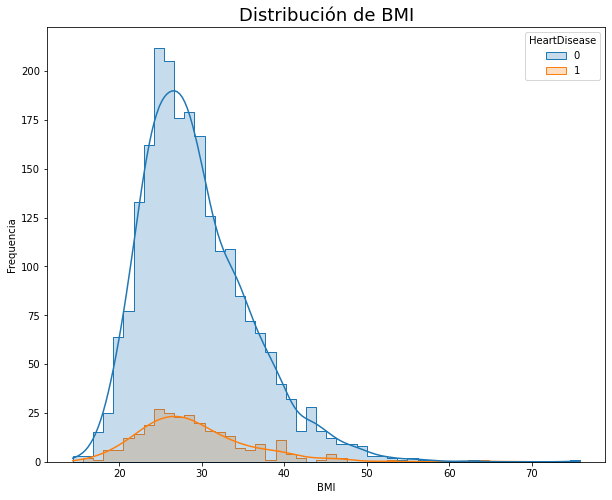

In [39]:
Distribucion(df_falta_2,'BMI','HeartDisease')

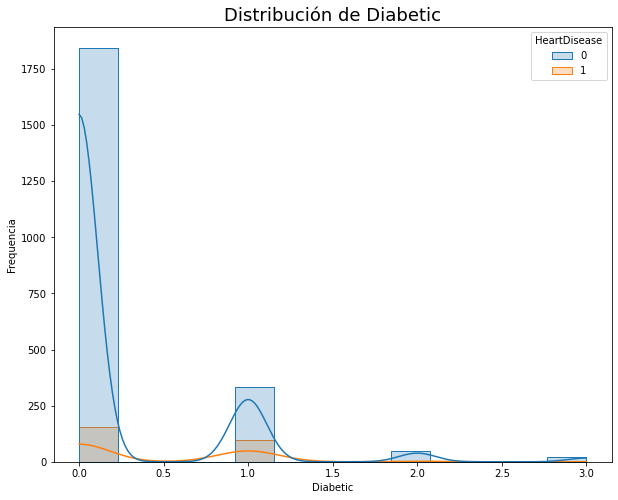

In [32]:
Distribucion(df_falta_2,'Diabetic','HeartDisease')

In [33]:
# Distancia euclidiana
def distancia_euclidiana(puntos_, punto1_):
    n_ = len(puntos_)
    de_ = np.zeros(n_)
    peso_numerador = df_codificado.shape[1] - 1
    for p in range(n_):
        punto_2 = puntos_[p:p+1]
        punto_1_2_ = pd.concat([punto_2, punto1_])
        punto_1_2_ = punto_1_2_.dropna(axis = 1) 
        punto_1_2_ = np.asarray(punto_1_2_)
        diferencia = np.subtract(punto_1_2_[0:1], punto_1_2_[1:2])
        #diferencia = np.asarray(diferencia)
        peso_denominador = len(diferencia[0])
        cuadrados = diferencia ** 2
        suma_cuadrados_ = np.sum(cuadrados,axis = 1)
        peso = peso_numerador / peso_denominador
        de_[p] = np.sqrt(suma_cuadrados_ * peso)
    de_ = pd.DataFrame(de_)
    return de_

In [34]:
# Calcular valor a imputar
def encontrar(distancias_, df_, atributo_, k_):
    df_concatenado = pd.concat([dist, df_[atributo_]], axis = 1)
    df_concatenado = df_concatenado.dropna(axis = 0)
    distancias_min_max_ = df_concatenado.sort_values(0)
    vecinos_cercanos_ = distancias_min_max_.index.values[1:k_ + 1]
    valores_nan_ = df_[atributo_][vecinos_cercanos_].tolist()
    valor_imputar_ = np.bincount(valores_nan_).argmax()
    return valor_imputar_

# Imputación

In [ ]:
df_falta_3 = df_falta_2.copy()
columnas = list(df_falta_3.columns[df_falta_3.isnull().any()])
for c in tqdm(columnas):
    indices_nan = df_falta_3[df_falta_3[c].isnull()][c]
    f = list(indices_nan.index)
    obs_ = df_falta_3[c].value_counts() #Return a Series containing counts of unique values.
    k = len(obs_) + 1
    for fil in tqdm(f):
        p1  = df_falta_3[fil:fil + 1]
        dist = distancia_euclidiana(df_falta_3,p1)
        v_nan = encontrar(dist,df_falta_3, c, k)
        df_falta_3[c][fil] = v_nan

  0%|          | 0/2500 [00:00<?, ?it/s]C:\Users\sleyv\AppData\Local\Temp\ipykernel_14788\1896981686.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_falta_3[c][fil] = v_nan

  0%|          | 1/2500 [00:05<3:30:18,  5.05s/it]C:\Users\sleyv\AppData\Local\Temp\ipykernel_14788\1896981686.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_falta_3[c][fil] = v_nan

  0%|          | 2/2500 [00:10<3:35:18,  5.17s/it]C:\Users\sleyv\AppData\Local\Temp\ipykernel_14788\1896981686.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

# Pruebas

In [70]:
Datos_Faltantes(df_falta_2)

Datos faltantes por atributo:
 HeartDisease           0
BMI                 2500
Smoking              750
AlcoholDrinking        0
Stroke              1000
PhysicalHealth         0
MentalHealth           0
DiffWalking            0
Sex                    0
AgeCategory            0
Race                1500
Diabetic            2500
PhysicalActivity       0
GenHealth            500
SleepTime              0
Asthma                 0
KidneyDisease          0
SkinCancer             0
dtype: int64


In [583]:
df_falta_3.head(10)

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   
5             1  28.87        1                0       0             6.0   
6             0  21.63        0                0       0            15.0   
7             0  31.64        1                0       0             5.0   
8             0  26.45        0                0       0             0.0   
9             0  40.69        0                0       0             0.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            0    0            3     0       1.0   
1           0.0            0    0            5     0       0.0   
2          30.0            0    1            0     0       1.0   
3           0.0            0    0            7     0       0.0   
4           0.0            1    0            9     0       0.0   
5           0.0            1    0            7     2       0.0   
6           0.0            0    0            2     0       0.0   
7           0.0            1    0            5     0       1.0   
8           0.0            0    0            5     0       2.0   
9           0.0            1    1            0     0       0.0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 0          0        5.0       1              0           1  
1                 0          0        7.0       0              0           0  
2                 0          3        8.0       1              0           0  
3                 1          1        6.0       0              0           1  
4                 0          0        8.0       0              0           0  
5                 1          3       12.0       0              0           0  
6                 0          3        4.0       1              0           1  
7                 1          1        9.0       1              0           0  
8                 1          3        5.0       0              1           0  
9                 0          1       10.0       0              0           0

In [ ]:
#sns.pairplot(df_codificado, vars=df.columns[1:], hue=df.columns[0])

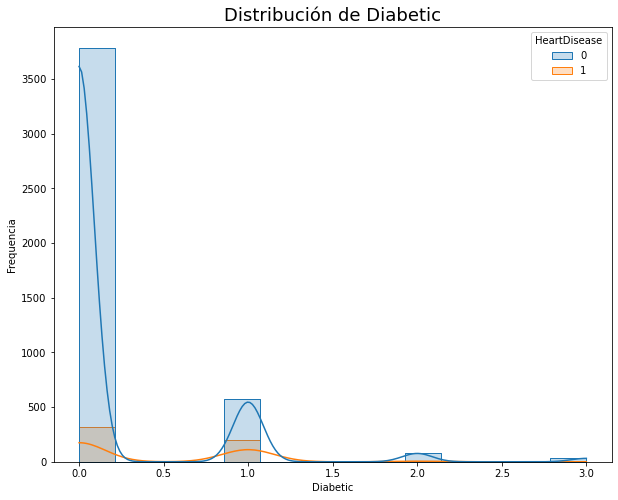

In [55]:
Distribucion(df_falta_3,'Diabetic','HeartDisease')